In [167]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [168]:
drugs=pd.read_csv("C:/Users/LENOVO/Desktop/kaggle/hackaton/drugsComTrain_raw.csv")
drugs.head(30)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [169]:
drugs.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [170]:
s=drugs.drugName.value_counts().nlargest(10)
s

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Name: drugName, dtype: int64

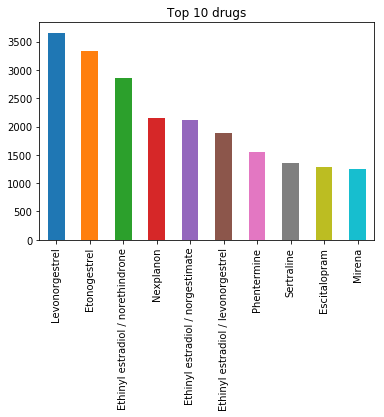

In [201]:
plt.title('Top 10 drugs')
s.plot(kind='bar')

In [172]:
(drugs.isna().sum().sum()/161297)*100

0.5573569254232875

# Top 10 drugs with best and worst rating

In [173]:
t10rat=drugs.groupby(['rating']).drugName.value_counts().nlargest(20,'first').sort_index(ascending=False)
t10rat=t10rat[:10].sort_values(ascending=False).nlargest(10)
t10rat

rating  drugName                         
10      Levonorgestrel                       1395
        Phentermine                           813
        Etonogestrel                          646
        Varenicline                           479
        Ethinyl estradiol / norethindrone     470
        Escitalopram                          454
        Clonazepam                            436
        Plan B                                413
        Sertraline                            412
        Nexplanon                             396
Name: drugName, dtype: int64

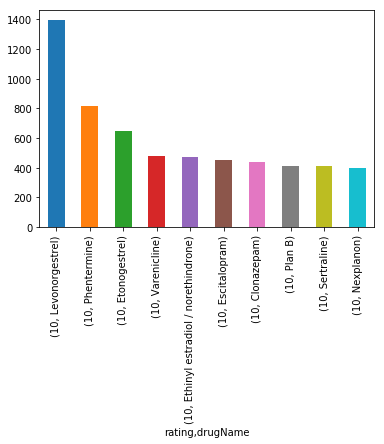

In [174]:
plt.title('Top 10 best drugname-condition by rating')
t10rat.plot(kind='bar')

In [185]:
t10ratlow=drugs.groupby(['rating']).drugName.value_counts().nsmallest(20,'first').sort_index(ascending=False)
t10ratlow=t10ratlow[:10].sort_values(ascending=False).nsmallest(10)
t10ratlow

rating  drugName        
1       Aciphex             1
        ActoPlus Met        1
        Acyclovir           1
        Adempas             1
        Adenosine           1
        Advil Liqui-Gels    1
        Afinitor            1
        Aflibercept         1
        Alamast             1
        Aller-Ease          1
Name: drugName, dtype: int64

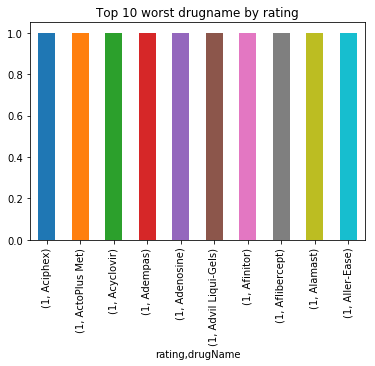

In [200]:
plt.title('Top 10 worst drugname by rating')
t10ratlow.plot(kind='bar')

# Top 10 pair (Drug, Condition) with best and worst rating 

In [179]:
t10cond=drugs.groupby(['rating','condition']).drugName.value_counts().nlargest(20,'first').sort_index(ascending=False)
t10cond=t10cond.sort_index(ascending=False)
t10cond=t10cond[:10].sort_values(ascending=False).nlargest(10)
t10cond=t10cond.sort_index(ascending=False)[:10]
t10cond

rating  condition                drugName                         
10      Weight Loss              Phentermine                          651
        Smoking Cessation        Varenicline                          475
                                 Chantix                              395
        Emergency Contraception  Plan B                               408
                                 Levonorgestrel                       756
        Birth Control            Nexplanon                            394
                                 Levonorgestrel                       584
                                 Etonogestrel                         641
                                 Ethinyl estradiol / norethindrone    404
9       Birth Control            Levonorgestrel                       416
Name: drugName, dtype: int64

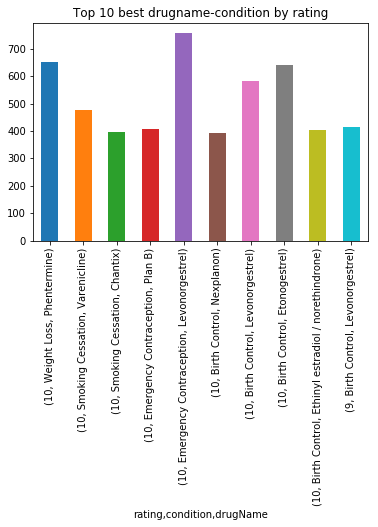

In [199]:
plt.title('Top 10 best drugname-condition by rating')
t10cond.plot(kind='bar')

In [188]:
t10condlow=drugs.groupby(['rating','condition']).drugName.value_counts().nsmallest(20,'first').sort_index(ascending=False)
t10condlow=t10condlow.sort_index(ascending=False)
t10condlow=t10condlow[:10].sort_values(ascending=False).nsmallest(10)
t10condlow=t10condlow.sort_index(ascending=False)[:10]
t10condlow

rating  condition                                    drugName                         
1       15</span> users found this comment helpful.  Ultram                               1
                                                     Rogaine                              1
                                                     Flexeril                             1
        14</span> users found this comment helpful.  Yasmin                               1
                                                     Vimovo                               1
                                                     Hair Regrowth Treatment for Women    1
                                                     Contrave                             1
        13</span> users found this comment helpful.  Duexis                               1
        11</span> users found this comment helpful.  Levaquin                             1
        10</span> users found this comment helpful.  Bontril Slow Release            

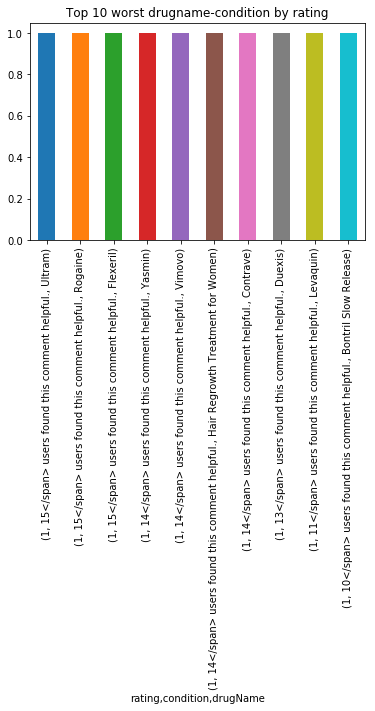

In [198]:
plt.title('Top 10 worst drugname-condition by rating')
t10condlow.plot(kind='bar')

# Top 10 condition count

In [183]:
conditions=drugs.condition.value_counts().nlargest(10)
conditions

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

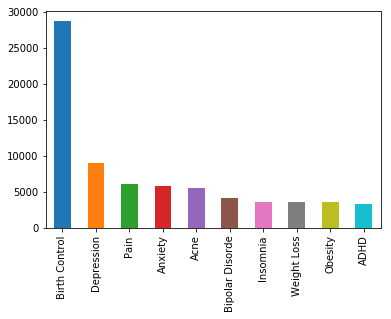

In [184]:
conditions.plot(kind='bar')